# User Overview Analysis

### Import Libraries and Modules

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'user_overview' in sys.modules:
    del sys.modules['user_overview']

from data_loader import DataLoader
from user_overview import UserOverview



### Load Data from PostgreSQL and create a UserOverview Object

In [2]:
loader = DataLoader()
df = loader.load_data("SELECT * FROM public.xdr_data")
cleaned_df = loader.clean_data(df)

df = cleaned_df
user_overview = UserOverview(df)

### Summary Statistics

In [ ]:
statistics = user_overview.describe_dataset()
statistics

### Top Handsets and Manufacturers


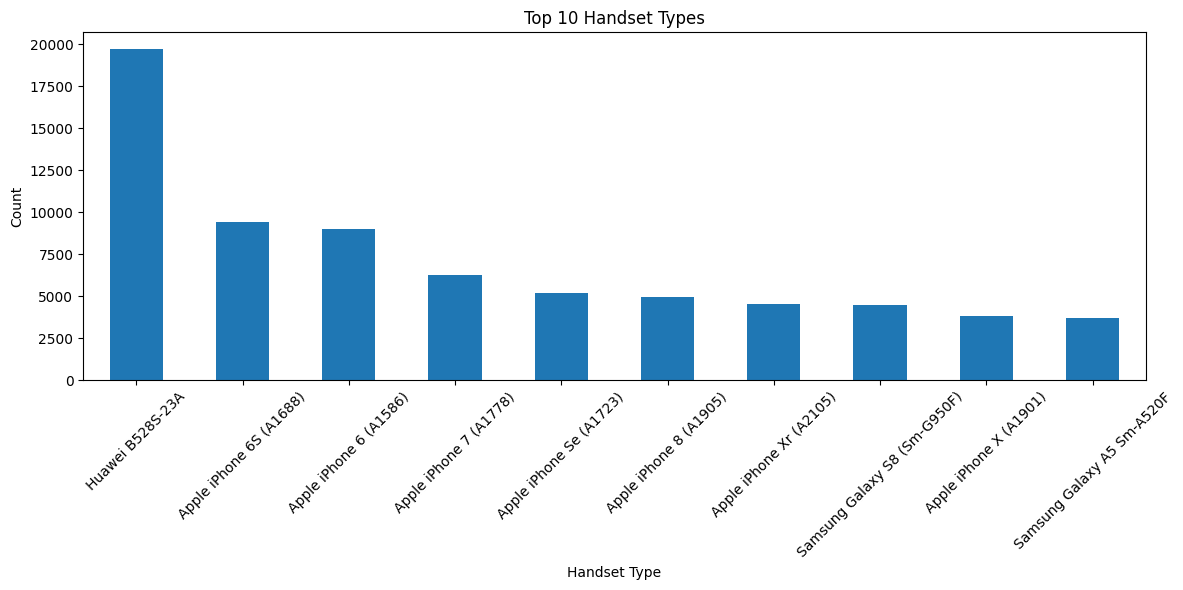

In [5]:
user_overview.plot_top_handset_types()

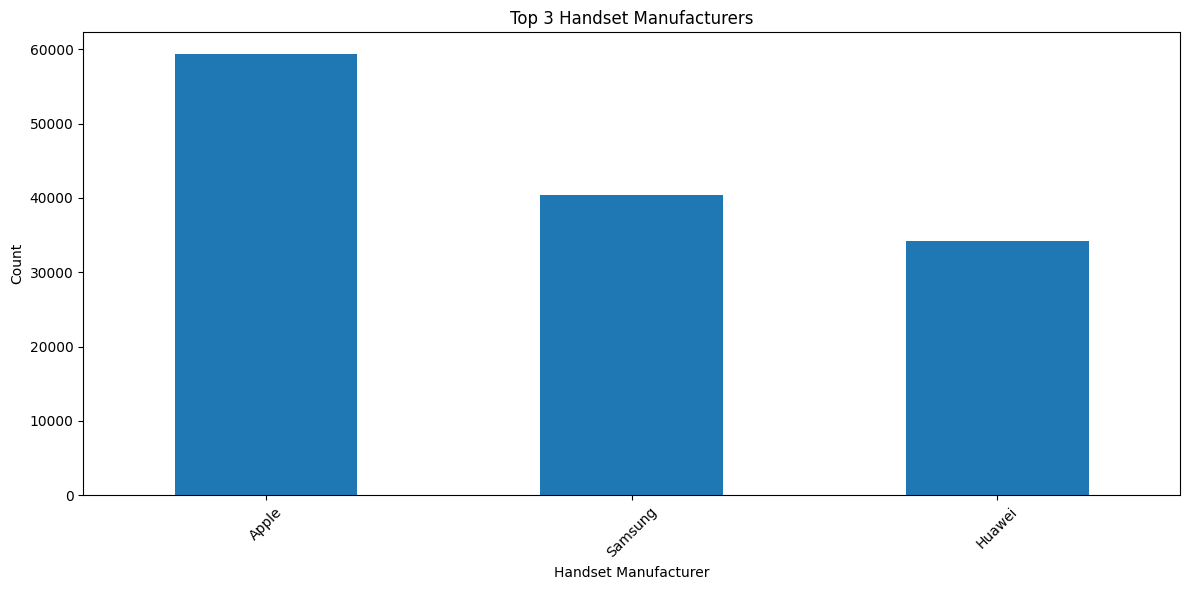

In [6]:
user_overview.plot_top_handset_manufacturers()

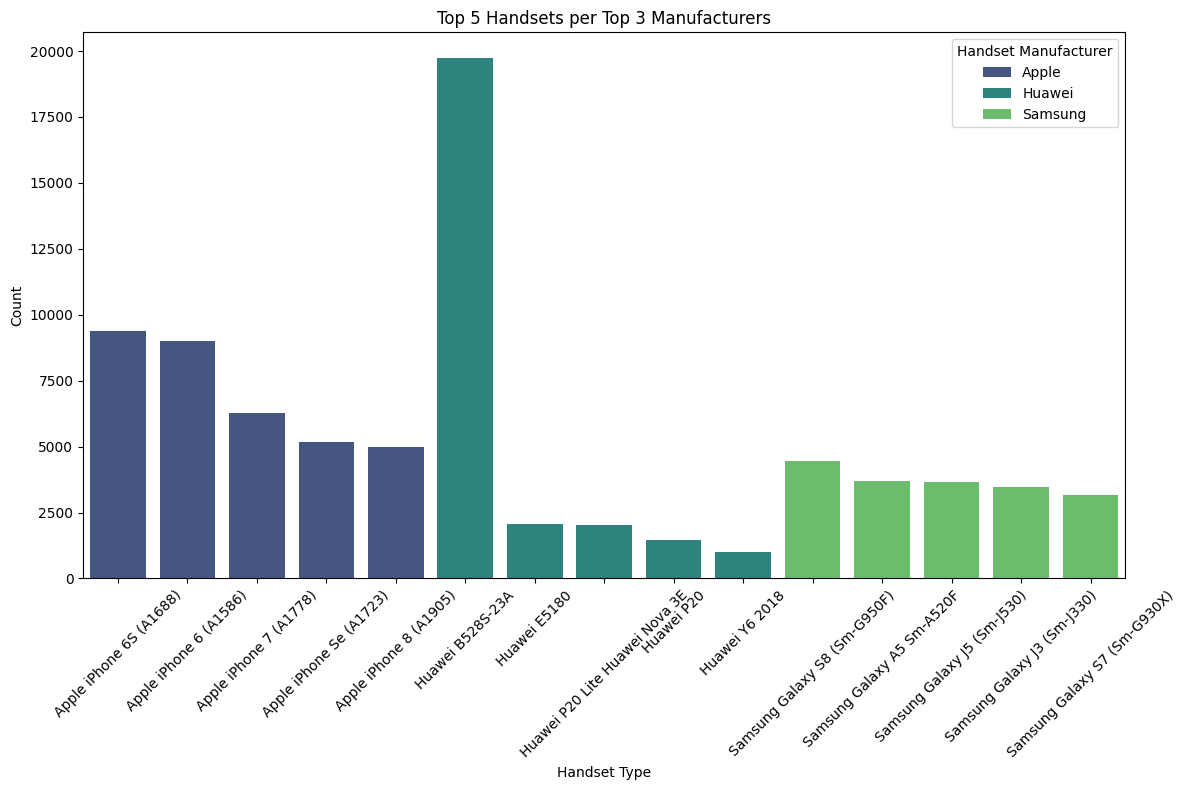

In [8]:
user_overview.plot_top_handsets_per_manufacturer()

### Aggregates xDR

In [10]:
sessions = df.groupby('MSISDN/Number').size().reset_index(name='Count')

# sessions.shape
sessions['Count'].value_counts().head(2)

Count
1    72269
2    20165
Name: count, dtype: int64

In [11]:
columns_media = ['Social Media DL (Bytes)','Social Media UL (Bytes)',
                 'Google DL (Bytes)','Google UL (Bytes)',
                 'Email DL (Bytes)', 'Email UL (Bytes)',
                 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                 'Other DL (Bytes)', 'Other UL (Bytes)',
                 'Total UL (Bytes)', 'Total DL (Bytes)']

# df[columns_media].describe()


In [12]:
# Aggregates per user
aggregates_per_users = df.groupby('MSISDN/Number').agg({
    # Total or average session duration
    'Dur. (ms)': 'sum',
    
    # Summing up the columns listed in columns_to_sum
    **{col: 'sum' for col in columns_media}
}).reset_index()
                 

In [13]:
# Add a new column for total application data volume (in Bytes) for each session per user
aggregates_per_users['Total Data Volume (Bytes)'] = aggregates_per_users[
    [col for col in columns_media if 'DL' in col or 'UL' in col]
].sum(axis=1)

# Display the aggregated DataFrame
aggregates_per_users.head()

,MSISDN/Number,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
0,3.360100e+10,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,36053108.0,8.426375e+08,2.134478e+09
1,3.360100e+10,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,36104459.0,1.207552e+08,5.932770e+08
2,3.360101e+10,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,20327526.0,4.019932e+08,8.698894e+08
3,3.360101e+10,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,94280527.0,1.363130e+09,3.692466e+09
4,3.360101e+10,253983.0,3787122.0,5790.0,11993496.0,3269638.0,6513834.0,1334762.0,12169742.0,22177380.0,14569029.0,15746472.0,5.061747e+08,5461038.0,480358608.0,12014169.0,60009249.0,5.552080e+08,1.710793e+09


## Decile top 5

In [14]:
decile_aggregates = user_overview.segment_and_compute_decile()
print(decile_aggregates)

   Decile  Total DL (Bytes)  Total UL (Bytes)  Total Data (Bytes)
3       4      1.051209e+13      9.526372e+11        1.146473e+13
9      10      8.238674e+12      7.428971e+11        8.981571e+12
8       9      7.593999e+12      6.902389e+11        8.284238e+12
2       3      6.174735e+12      5.603057e+11        6.735041e+12
7       8      6.147244e+12      5.506618e+11        6.697906e+12


### Univariate Non-Graphical

In [126]:
uvt_analysis = user_overview.univariate_analysis()
uvt_analysis

,Mean,Median,Variance,Standard Deviation,Range
Bearer Id,1.013154e+19,7.349883e+18,8.370536e+36,2.893188e+18,6.269004e+18
Start ms,4.991516e+02,4.990000e+02,8.330820e+04,2.886316e+02,9.990000e+02
End ms,4.988313e+02,5.000000e+02,8.305348e+04,2.881900e+02,9.990000e+02
Dur. (ms),1.036929e+05,8.639900e+04,6.269304e+09,7.917893e+04,1.852194e+06
IMSI,2.082016e+14,2.082015e+14,2.472073e+20,1.572283e+10,4.205059e+12
MSISDN/Number,4.244085e+10,3.366370e+10,6.397215e+24,2.529272e+12,8.823635e+14
IMEI,4.842294e+13,3.572921e+13,5.015563e+26,2.239545e+13,9.856119e+13
Avg RTT DL (ms),1.065177e+02,5.300000e+01,2.935595e+05,5.418113e+02,9.692300e+04
Avg RTT UL (ms),1.756804e+01,7.000000e+00,5.861460e+03,7.656017e+01,7.120000e+03
Avg Bearer TP DL (kbps),1.355594e+04,6.400000e+01,5.807388e+08,2.409852e+04,3.781600e+05


### Univariate Analysis Graphical

e:\Studies\tenx\w2\src\eda.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


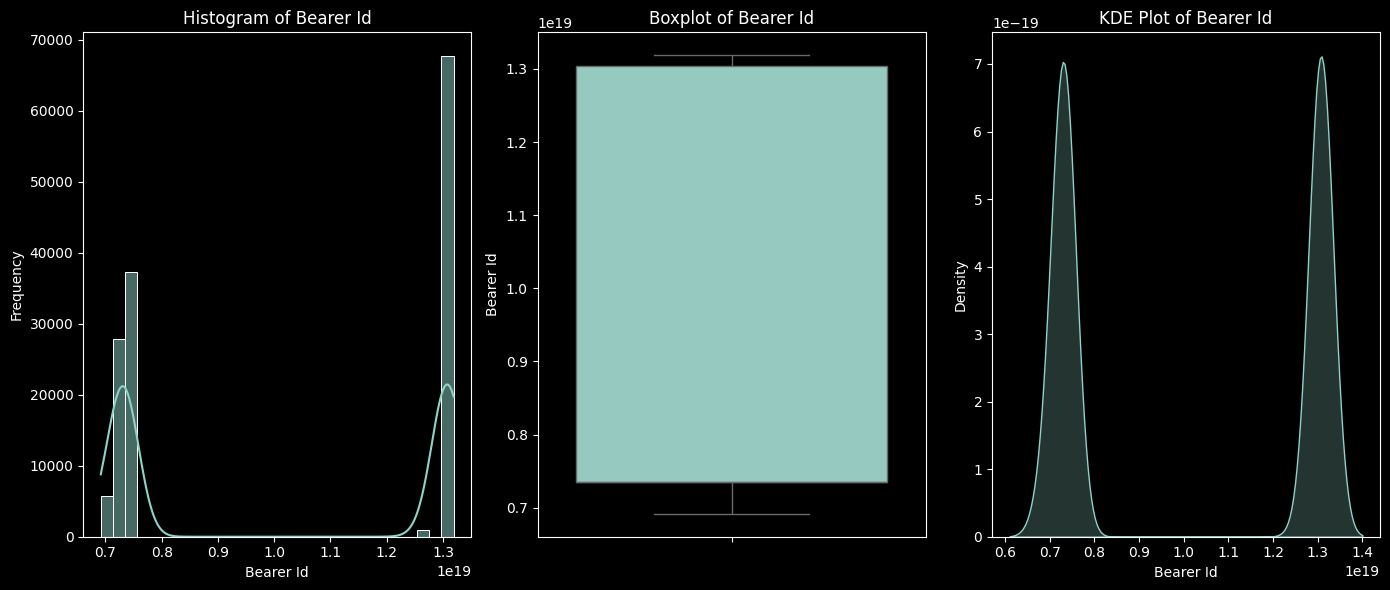

e:\Studies\tenx\w2\src\eda.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


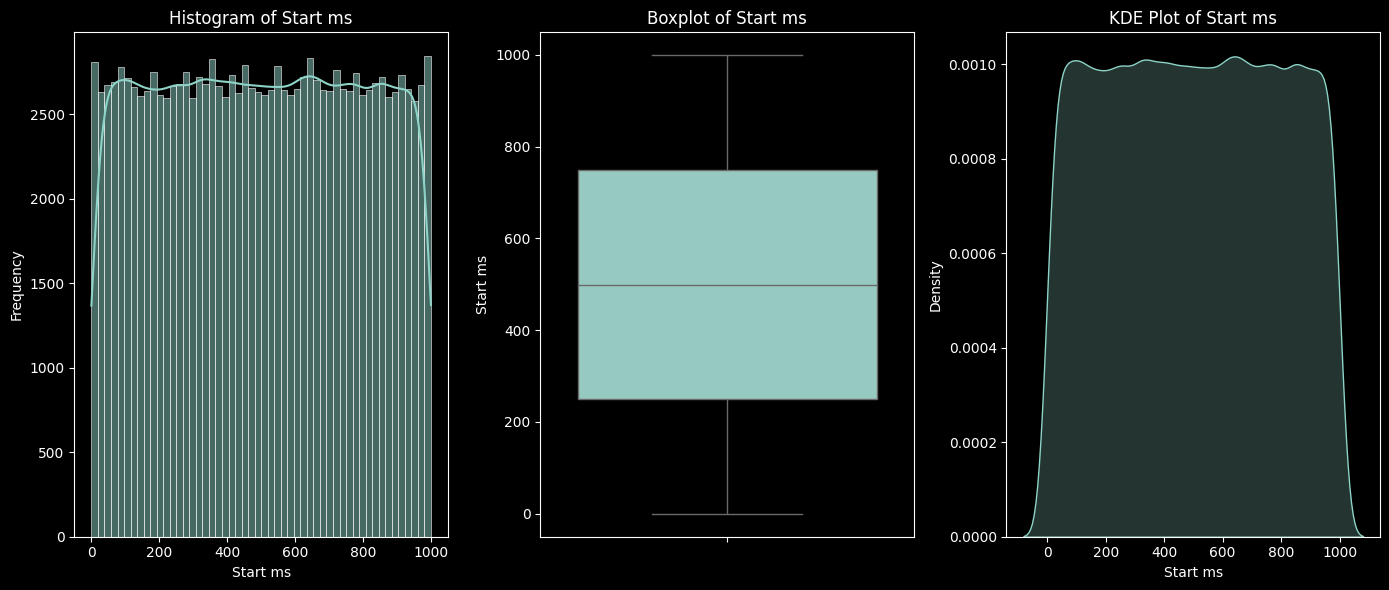

e:\Studies\tenx\w2\src\eda.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


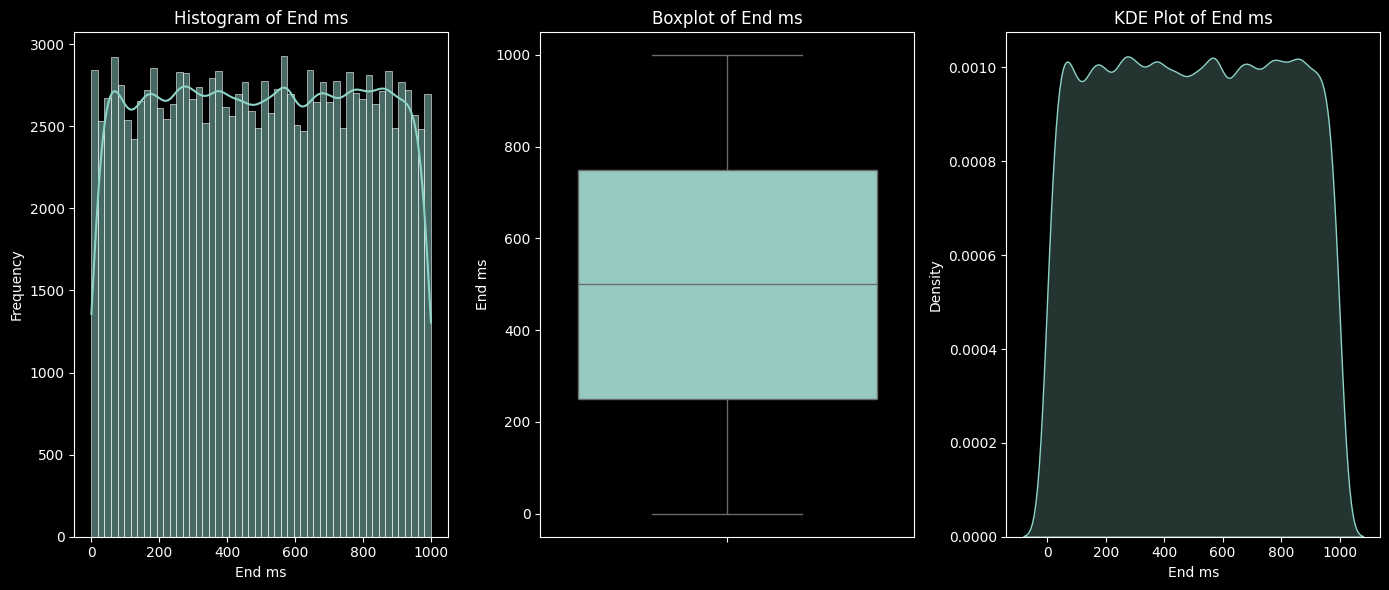

e:\Studies\tenx\w2\src\eda.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


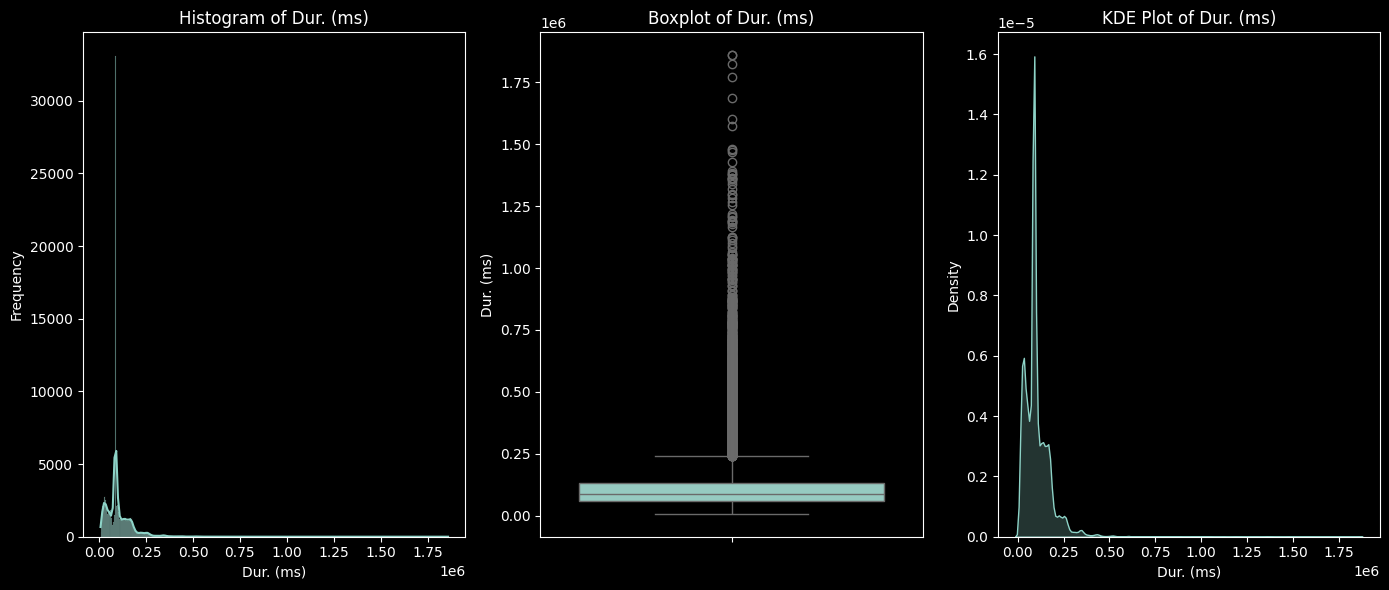

e:\Studies\tenx\w2\src\eda.py:125: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(quantitative_df[column], shade=True)


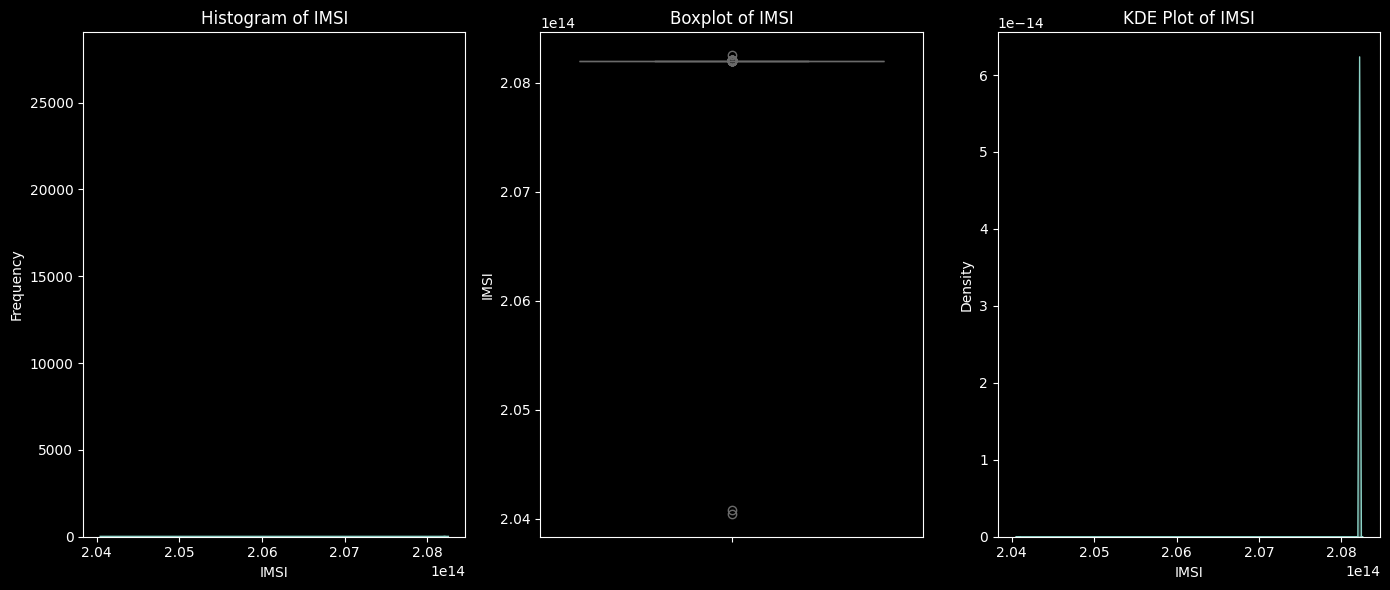

MemoryError: Unable to allocate 5.34 GiB for an array with shape (717093365,) and data type int64

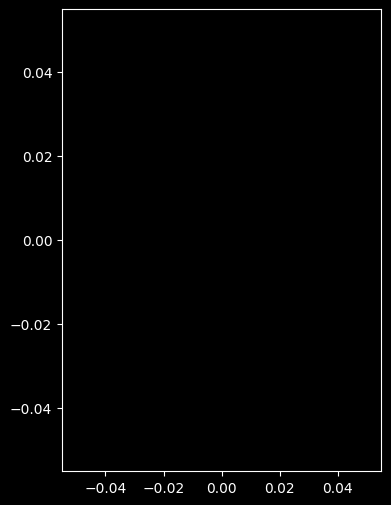

In [127]:
# user_overview.graphical_univariate_analysis()

### Bivariant Analysis

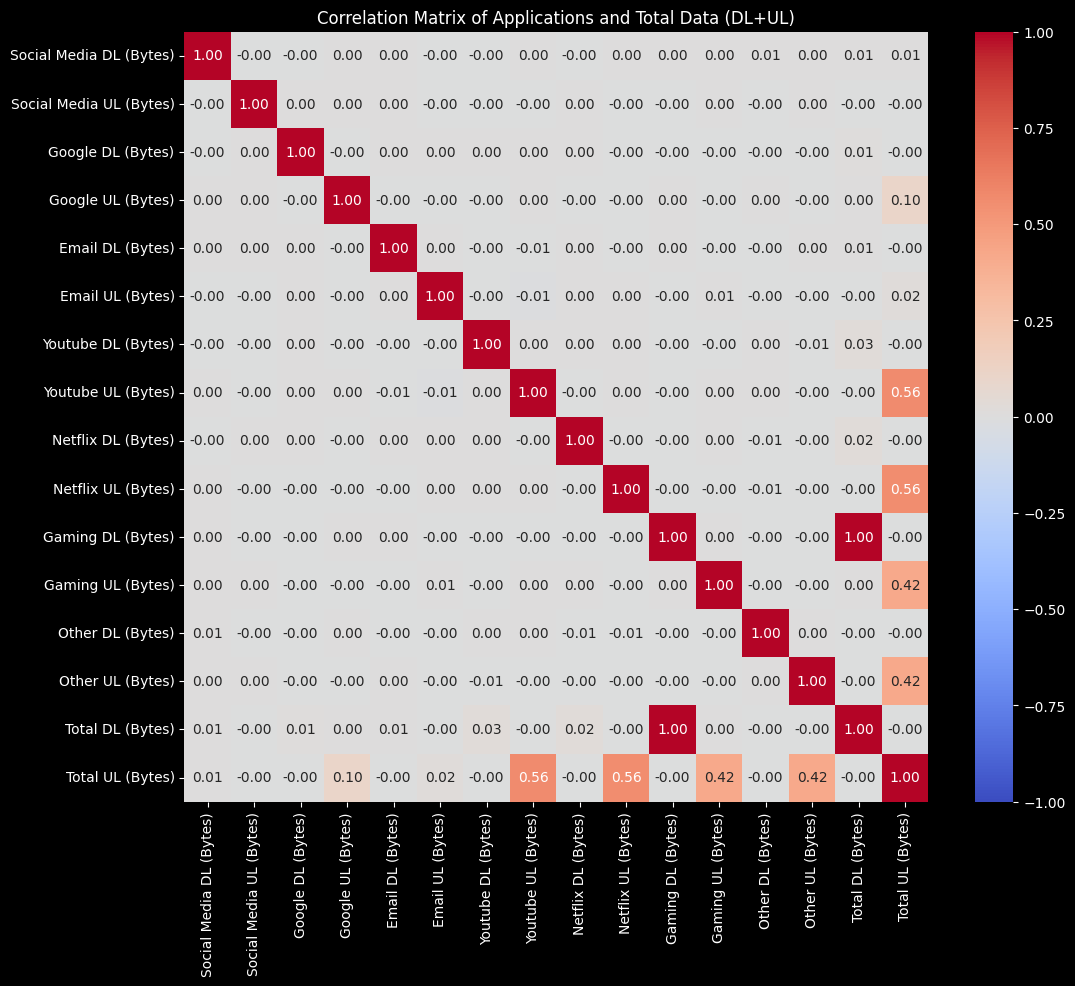

{'correlation_matrix':                          Social Media DL (Bytes)  Social Media UL (Bytes)  \
 Social Media DL (Bytes)                 1.000000                -0.001364   
 Social Media UL (Bytes)                -0.001364                 1.000000   
 Google DL (Bytes)                      -0.003059                 0.003957   
 Google UL (Bytes)                       0.000984                 0.001269   
 Email DL (Bytes)                        0.004037                 0.003190   
 Email UL (Bytes)                       -0.002399                -0.001818   
 Youtube DL (Bytes)                     -0.001974                -0.002394   
 Youtube UL (Bytes)                      0.003091                -0.002760   
 Netflix DL (Bytes)                     -0.001609                 0.000341   
 Netflix UL (Bytes)                      0.003074                -0.001896   
 Gaming DL (Bytes)                       0.000889                -0.000507   
 Gaming UL (Bytes)                       0

In [128]:
bvt_analysis = user_overview.bivariate_analysis()
bvt_analysis

### Correlation Matrix

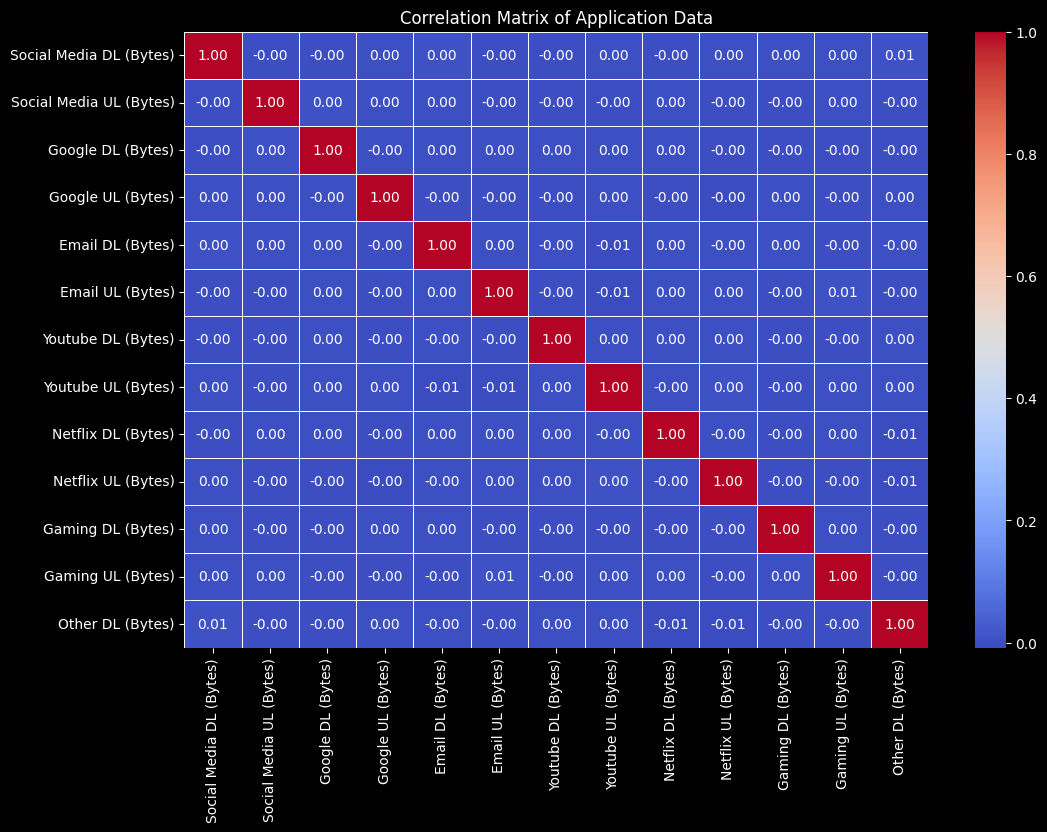

In [129]:
corr_matrix = user_overview.plot_correlation_matrix()

### PCA Analysis

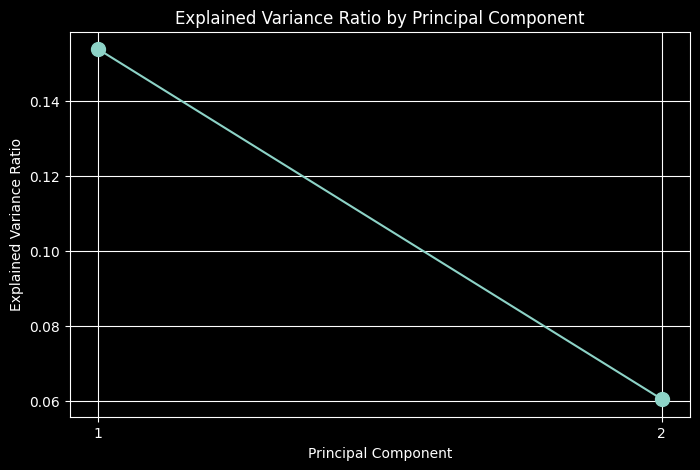

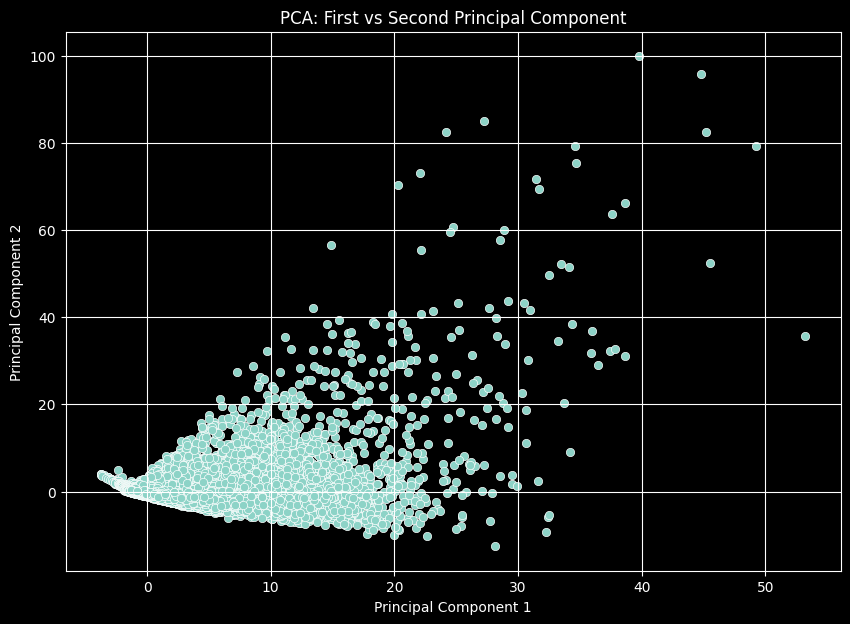

{'pca_df':              PC1       PC2
 0      -3.689494  3.975577
 1      -2.999189  2.945405
 2      -3.013662  2.988848
 3      -2.633845  2.383172
 4      -2.122314  2.106589
 ...          ...       ...
 139449 -1.278424  0.273513
 139450 -1.244471  0.214573
 139451 -1.269776  0.269723
 139452 -1.271900  0.275486
 139453 -0.849771  0.109764
 
 [139454 rows x 2 columns],
 'explained_variance': array([0.15384132, 0.06053359]),
 'loadings':                                                PC1       PC2
 Start ms                                  0.000349 -0.000838
 End ms                                    0.000531 -0.001004
 Dur. (ms)                                -0.055634  0.084635
 IMSI                                      0.001250 -0.005434
 MSISDN/Number                            -0.000924  0.004465
 IMEI                                      0.186132 -0.072284
 Avg RTT DL (ms)                           0.002754 -0.004459
 Avg RTT UL (ms)                           0.044020  0.02273

In [130]:
pca_analysis = user_overview.pca_analysis()
pca_analysis

In [7]:
df[['MSISDN/Number','IMSI']].head(2)

,MSISDN/Number,IMSI
0,3.366496e+10,2.082014e+14
1,3.368185e+10,2.082019e+14
